In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle


In [2]:
df=pd.read_csv('Iris Dataset.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.iloc[0]

Id                         1
SepalLengthCm            5.1
SepalWidthCm             3.5
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 0, dtype: object

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13876\1987143588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette='viridis')


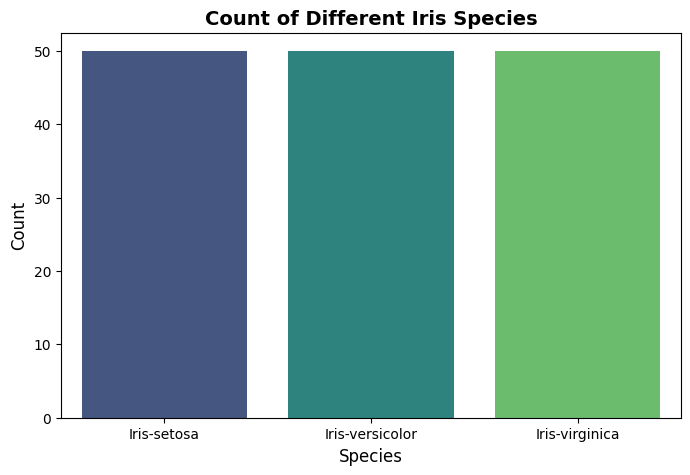

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=df, palette='viridis')
plt.title('Count of Different Iris Species', fontsize=14, fontweight='bold')
plt.xlabel('Species', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


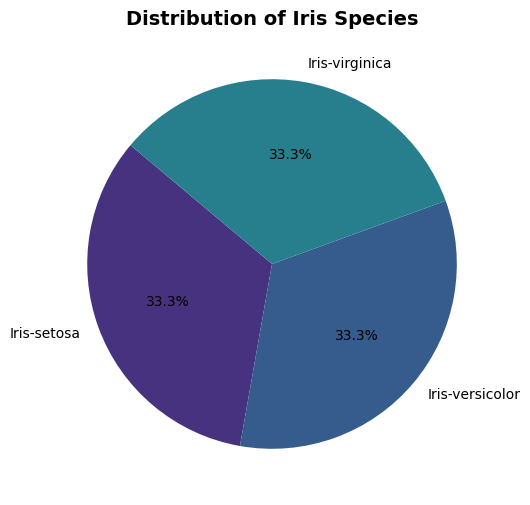

In [24]:
species_counts = df['Species'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Iris Species', fontsize=14, fontweight='bold')
plt.show()


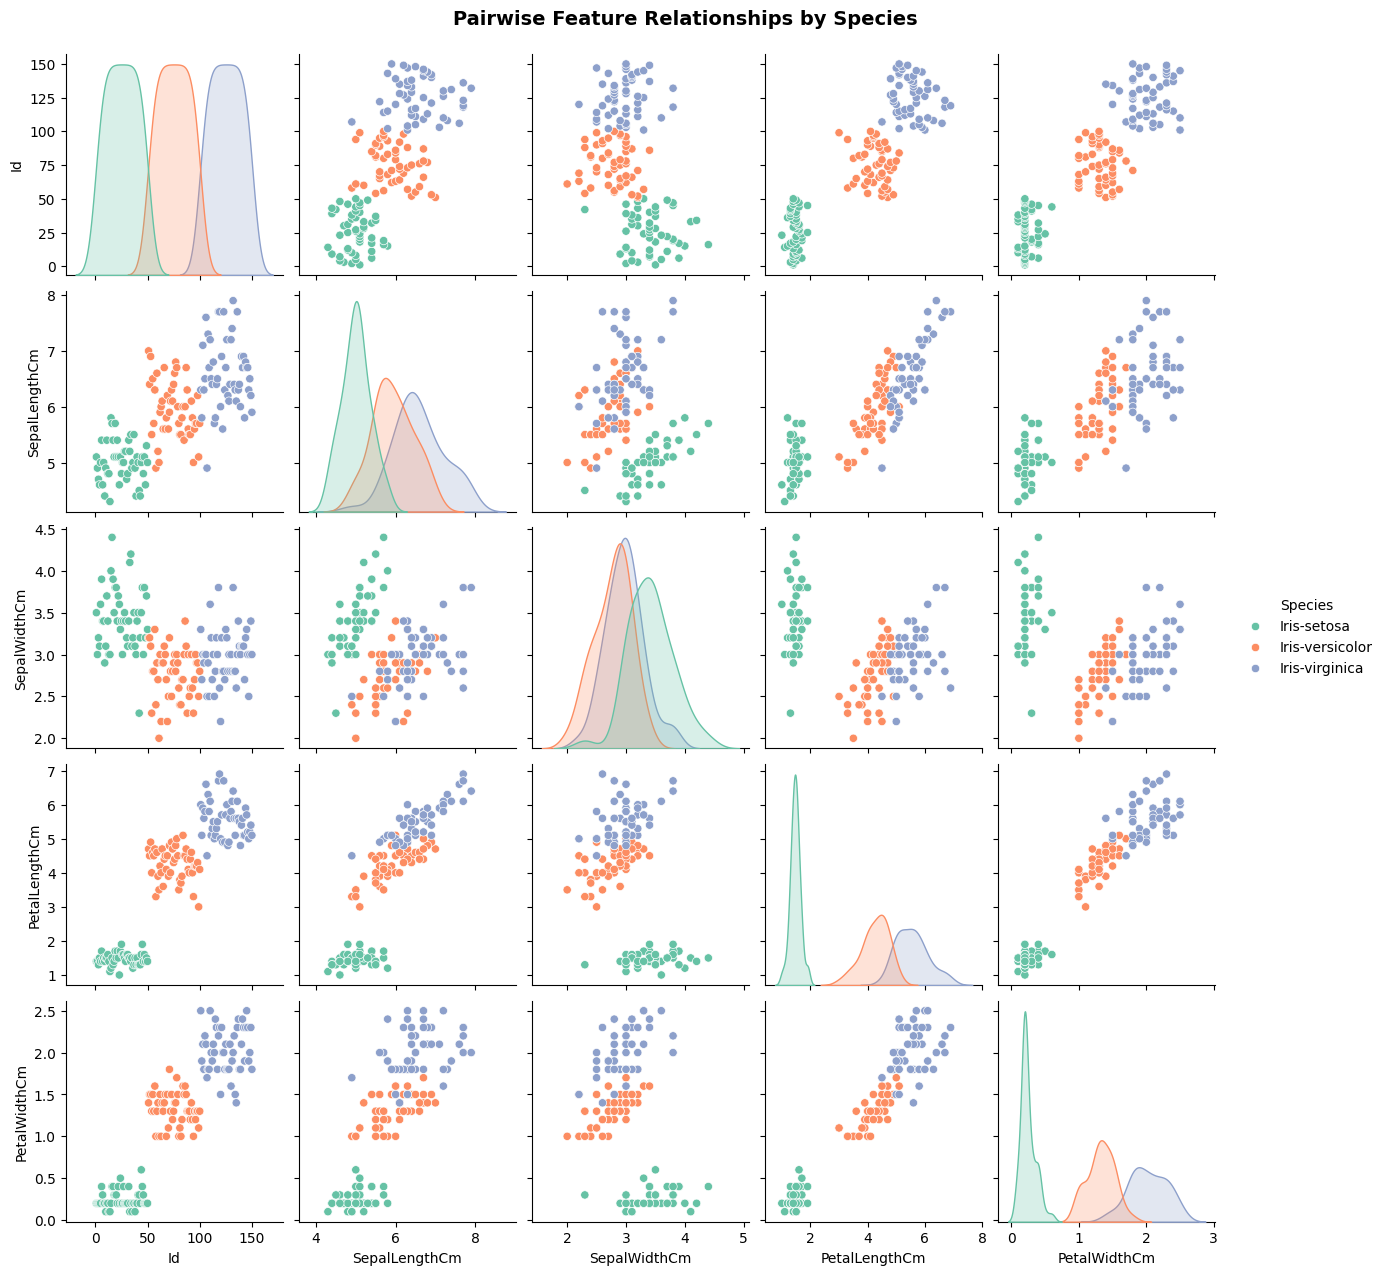

In [26]:
#Pairplot – Relationships Between All Features
sns.pairplot(df, hue='Species', palette='Set2', diag_kind='kde')
plt.suptitle('Pairwise Feature Relationships by Species', y=1.02, fontsize=14, fontweight='bold')
plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13876\4160828871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='SepalLengthCm', data=df, palette='coolwarm')


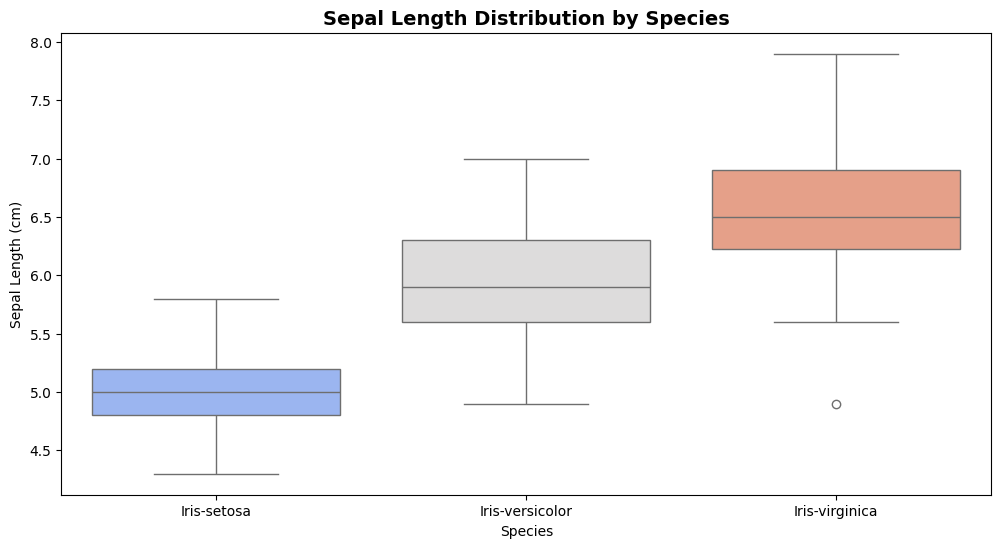

In [27]:
# Boxplot – Feature Distribution by Species
plt.figure(figsize=(12,6))
sns.boxplot(x='Species', y='SepalLengthCm', data=df, palette='coolwarm')
plt.title('Sepal Length Distribution by Species', fontsize=14, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13876\866981474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette='mako')


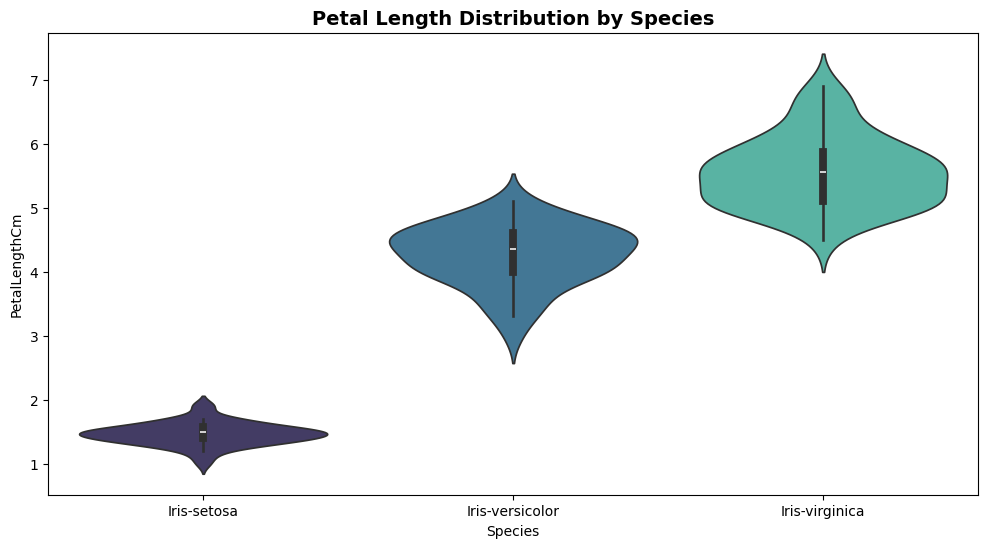

In [28]:
# Violin Plot – Combined Distribution & Density
plt.figure(figsize=(12,6))
sns.violinplot(x='Species', y='PetalLengthCm', data=df, palette='mako')
plt.title('Petal Length Distribution by Species', fontsize=14, fontweight='bold')
plt.show()


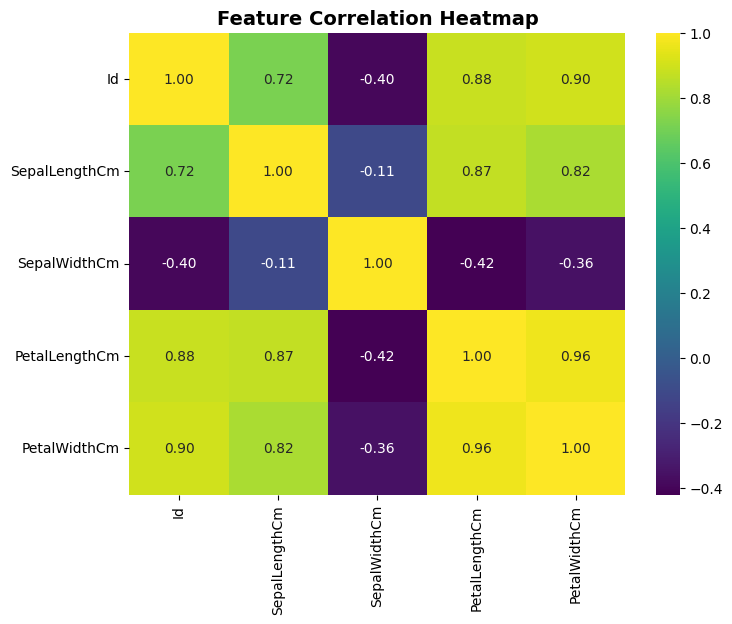

In [29]:
# Heatmap – Correlation Between Features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis', fmt='.2f')
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


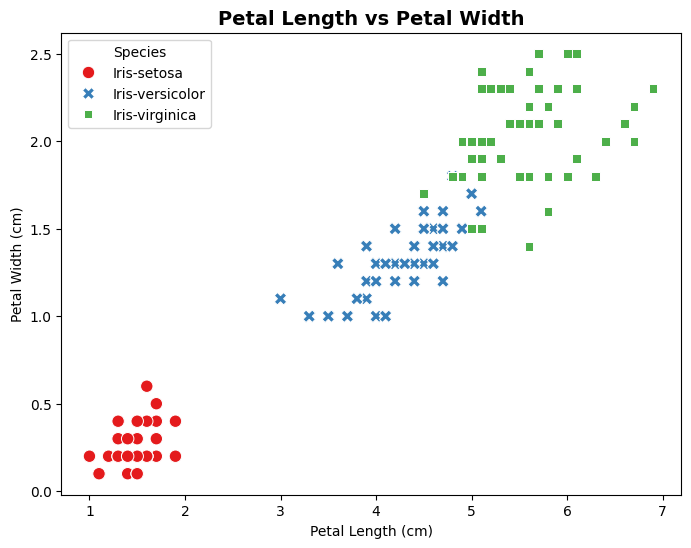

In [32]:
# Scatter Plot – Petal Features Comparison
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='PetalLengthCm',
    y='PetalWidthCm',
    hue='Species',
    style='Species',
    s=80,
    palette='Set1'
)
plt.title('Petal Length vs Petal Width', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()



In [8]:
X = df.drop(['Id', 'Species'], axis=1)

In [9]:
y=df['Species']

In [21]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [11]:
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
y.head(4)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
Name: Species, dtype: object

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
test_predi=knn.predict(X_test)

In [17]:
Accuracy=accuracy_score(y_test,test_predi)

In [18]:
Accuracy*100

100.0

In [19]:
with open('KNeighbors_model.pkl','wb') as file:
    pickle.dump(knn,file)

In [20]:
sample = [[5.1, 3.5, 1.4, 0.2]]

model = pickle.load(open('KNeighbors_model.pkl','rb'))
print(model.predict(sample))

['Iris-setosa']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
